## Flight Price Prediction Model

# 1. Exploratory Data Analysis

we will extract information from our data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load your data
x_train=pd.read_csv("x_train.csv")
y_train=pd.read_csv("y_train.csv")
x_test=pd.read_csv("x_test.csv")

In [3]:
# Shape
y_train.shape

(5000, 2)

In [4]:
# check data
x_train.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0.0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0,0,c-2
1,1.0,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35,1,a-9
2,2.0,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20,1,c-4
3,3.0,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15,1,a-23
4,4.0,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20,0,b-1


In [5]:
y_train.head()

,Unnamed: 0,target
0,0,7400
1,1,8650
2,2,9150
3,3,10400
4,4,8697


In [6]:
# I will take sample out of this data

# merge two datasets to make one
df=pd.concat([x_train,y_train],axis=1) # horizontal
df.sample(15)



,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
1065,1065.0,2021-06-05 12:13:51.653831+00:00,x,y,2021-06-16 17:00:00+00:00,2021-06-16 18:59:00+00:00,gamma,True,20,1,c-6,1065,9877
343,343.0,2021-06-23 06:32:08.089314+00:00,x,y,2021-07-01 17:00:00+00:00,2021-07-01 18:59:00+00:00,gamma,True,20,1,c-6,343,7400
4501,4501.0,2021-08-12 07:01:32.312480+00:00,x,y,2021-08-22 07:00:00+00:00,2021-08-22 09:00:00+00:00,alpha,True,15,1,a-5,4501,9900
2863,2863.0,2021-08-20 07:57:22.290460+00:00,x,y,2021-08-30 10:30:00+00:00,2021-08-30 12:25:00+00:00,beta,True,20,0,b-69,2863,8739
4340,4340.0,2021-02-08 14:34:42.893556+00:00,x,y,2021-03-17 17:00:00+00:00,2021-03-17 18:59:00+00:00,gamma,True,32,1,c-6,4340,10227
4331,4331.0,2021-02-14 13:55:43.455104+00:00,x,y,2021-02-22 11:00:00+00:00,2021-02-22 13:00:00+00:00,gamma,True,32,1,c-4,4331,8697
1281,1281.0,2021-08-07 06:42:24.560706+00:00,x,y,2021-08-08 13:00:00+00:00,2021-08-08 15:00:00+00:00,alpha,True,20,1,a-9,1281,8155
1329,1329.0,2021-08-16 11:45:33.421056+00:00,x,y,2021-08-17 10:00:00+00:00,2021-08-17 12:00:00+00:00,alpha,True,20,1,a-7,1329,8739
3060,3060.0,2021-08-28 15:17:48.473209+00:00,x,y,2021-09-06 17:00:00+00:00,2021-09-06 18:59:00+00:00,gamma,True,20,2,c-6,3060,8739
979,979.0,2021-04-30 11:38:16.565487+00:00,x,y,2021-05-17 05:00:00+00:00,2021-05-17 07:00:00+00:00,gamma,True,0,0,c-2,979,9405


In [7]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
0,0.0,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0,0,c-2,0,7400
1,1.0,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35,1,a-9,1,8650
2,2.0,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20,1,c-4,2,9150
3,3.0,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15,1,a-23,3,10400
4,4.0,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20,0,b-1,4,8697


In [8]:
df.shape

(5000, 13)

In [9]:
df.sample(5000)

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
951,951.0,2021-03-29 15:30:31.021742+00:00,x,y,2021-03-31 08:00:00+00:00,2021-03-31 09:55:00+00:00,beta,True,20,0,b-67,951,9405
209,209.0,2021-05-20 18:57:21.949741+00:00,x,y,2021-06-26 05:00:00+00:00,2021-06-26 07:00:00+00:00,alpha,True,15,1,a-1,209,18156
4122,4122.0,2021-08-12 18:56:16.766455+00:00,x,y,2021-08-19 17:05:00+00:00,2021-08-19 19:05:00+00:00,omega,True,20,1,d-5,4122,8697
1194,1194.0,2021-07-25 14:31:41.794734+00:00,x,y,2021-07-27 13:00:00+00:00,2021-07-27 15:00:00+00:00,alpha,True,35,1,a-9,1194,8739
4862,4862.0,2021-08-07 07:47:02.608446+00:00,x,y,2021-08-15 16:00:00+00:00,2021-08-15 18:00:00+00:00,alpha,True,15,1,a-23,4862,10227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,260.0,2021-07-15 15:24:46.582140+00:00,x,y,2021-08-07 10:00:00+00:00,2021-08-07 12:00:00+00:00,alpha,True,35,1,a-7,260,8650
1329,1329.0,2021-08-16 11:45:33.421056+00:00,x,y,2021-08-17 10:00:00+00:00,2021-08-17 12:00:00+00:00,alpha,True,20,1,a-7,1329,8739
753,753.0,2021-08-17 07:05:37.682428+00:00,x,y,2021-08-19 04:40:00+00:00,2021-08-19 06:40:00+00:00,omega,True,20,1,d-1,753,10227
2297,2297.0,2021-06-17 04:27:40.955962+00:00,x,y,2021-07-15 04:00:00+00:00,2021-07-15 06:00:00+00:00,alpha,True,15,1,a-1,2297,12425


In [10]:
df=df.sample(5000)

In [11]:
#saving a csv file for training datset
df.to_csv("sastaticket_train.csv")

In [12]:
# saving testing file data to csv
x_test.sample(250).to_csv("sastaticket_test.csv")

In [13]:
df_test=pd.read_csv("sastaticket_test.csv")
df_test.head()


,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,361,2021-09-01 08:34:37.298046+00:00,x,y,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,alpha,True,15,1,a-23
1,4557,2021-09-01 09:10:26.280027+00:00,x,y,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,alpha,True,20,1,a-9
2,344,2021-09-01 08:34:05.805148+00:00,x,y,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,omega,True,20,1,d-5
3,4030,2021-09-01 09:06:33.024587+00:00,x,y,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,beta,True,20,0,b-1
4,339,2021-09-01 08:34:03.203863+00:00,x,y,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,alpha,True,15,1,a-5


In [14]:
df_test=df_test.sample(250)

In [15]:
print("column","rows",df.shape)

column rows (5000, 13)


In [16]:
# data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1612 to 4281
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4999 non-null   float64
 1   f1          5000 non-null   object 
 2   f2          5000 non-null   object 
 3   f3          5000 non-null   object 
 4   f4          5000 non-null   object 
 5   f5          5000 non-null   object 
 6   f6          5000 non-null   object 
 7   f7          5000 non-null   bool   
 8   f8          5000 non-null   int64  
 9   f9          5000 non-null   int64  
 10  f10         5000 non-null   object 
 11  Unnamed: 0  5000 non-null   int64  
 12  target      5000 non-null   int64  
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 512.7+ KB


In [17]:
# check null values
df.isnull().sum()

Unnamed: 0    1
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [18]:
# use drop.na method
df.dropna(subset=["target"],axis=0,inplace=True)

In [19]:
df.isnull().sum()

Unnamed: 0    1
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
Unnamed: 0    0
target        0
dtype: int64

In [20]:
# summary stats
df.describe()

,Unnamed: 0,f8,f9,Unnamed: 0,target
count,4999.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.000000,22.494400,0.944600,2499.500000,9679.084600
std,1443.231328,8.887101,0.607951,1443.520003,2143.258554
min,0.000000,0.000000,0.000000,0.000000,7400.000000
25%,1249.500000,20.000000,1.000000,1249.750000,8697.000000
50%,2499.000000,20.000000,1.000000,2499.500000,8739.000000
75%,3748.500000,32.000000,1.000000,3749.250000,10227.000000
max,4998.000000,45.000000,2.000000,4999.000000,32545.000000


In [21]:
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0,target
1612,1612.0,2021-06-16 17:06:59.662473+00:00,x,y,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,c-6,1612,10227
4914,4914.0,2021-08-27 11:29:37.356112+00:00,x,y,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,a-5,4914,8697
4137,4137.0,2021-03-08 19:38:55.101279+00:00,x,y,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,c-2,4137,10227
2147,2147.0,2021-03-14 04:39:33.073081+00:00,x,y,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,b-19,2147,8739
4066,4066.0,2021-08-28 18:00:52.593708+00:00,x,y,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,a-7,4066,11716


In [22]:
print(df.columns)

Index(['Unnamed: 0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'Unnamed: 0', 'target'],
      dtype='object')


In [23]:
# finding unique values in categorical lists
cat_list=["f2","f3","f6","f8","f9","f10"]

# unique values in each column
for i in cat_list:
    print(i,df[i].unique())
    print(".........................") # separater line

f2 ['x']
.........................
f3 ['y']
.........................
f6 ['gamma' 'alpha' 'beta' 'omega']
.........................
f8 [20 35 15  0 40 32 45]
.........................
f9 [1 0 2]
.........................
f10 ['c-6' 'a-5' 'c-2' 'b-19' 'a-7' 'a-1' 'b-9' 'c-4' 'a-23' 'b-69' 'a-9'
 'b-1' 'b-369' 'd-5' 'b-73' 'b-67' 'd-3' 'd-1' 'b-319']
.........................


we will remove these two columns f2 and f3 bcuz they dont have any multiple unique values

In [24]:
df.drop(["f2","f3","f10"],axis=1,inplace=True)

In [25]:
df.head()

,Unnamed: 0,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0,target
1612,1612.0,2021-06-16 17:06:59.662473+00:00,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,1612,10227
4914,4914.0,2021-08-27 11:29:37.356112+00:00,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,4914,8697
4137,4137.0,2021-03-08 19:38:55.101279+00:00,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,4137,10227
2147,2147.0,2021-03-14 04:39:33.073081+00:00,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,2147,8739
4066,4066.0,2021-08-28 18:00:52.593708+00:00,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,4066,11716


In [26]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [27]:
df.head()

,f1,f4,f5,f6,f7,f8,f9,target
1612,2021-06-16 17:06:59.662473+00:00,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,10227
4914,2021-08-27 11:29:37.356112+00:00,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,8697
4137,2021-03-08 19:38:55.101279+00:00,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,10227
2147,2021-03-14 04:39:33.073081+00:00,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,8739
4066,2021-08-28 18:00:52.593708+00:00,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,11716


In [28]:
# Type casting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1612 to 4281
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      5000 non-null   object
 1   f4      5000 non-null   object
 2   f5      5000 non-null   object
 3   f6      5000 non-null   object
 4   f7      5000 non-null   bool  
 5   f8      5000 non-null   int64 
 6   f9      5000 non-null   int64 
 7   target  5000 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 317.4+ KB


In [29]:
# converting them into date and time objects
from datetime import date,datetime
df["f1"]=pd.to_datetime(df["f1"])
df["f4"]=pd.to_datetime(df["f4"])
df["f5"]=pd.to_datetime(df["f5"])



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1612 to 4281
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   int64              
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   int64              
dtypes: bool(1), datetime64[ns, UTC](3), int64(3), object(1)
memory usage: 317.4+ KB


In [31]:
# Adding colimn after substraction
df.insert(0,"time_to_dep(s)",((df["f4"]-df["f1"]).astype("timedelta64[s]")),True)
df.insert(1,"travel_time(s)",((df["f5"]-df["f4"]).astype("timedelta64[s]")),True)

In [32]:
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
1612,1727580.0,7140.0,2021-06-16 17:06:59.662473+00:00,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,10227
4914,675022.0,7200.0,2021-08-27 11:29:37.356112+00:00,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,8697
4137,292864.0,7200.0,2021-03-08 19:38:55.101279+00:00,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,10227
2147,300026.0,6900.0,2021-03-14 04:39:33.073081+00:00,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,8739
4066,1353547.0,7200.0,2021-08-28 18:00:52.593708+00:00,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,11716


In [33]:
df.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
target            0
dtype: int64

In [34]:
df=df.rename(columns={"f12":"f1"})

In [35]:
cat_col=["f6","f7","f8","f9"]
num_col=["time_to_dep(s)","travel_time(s)"]

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result i

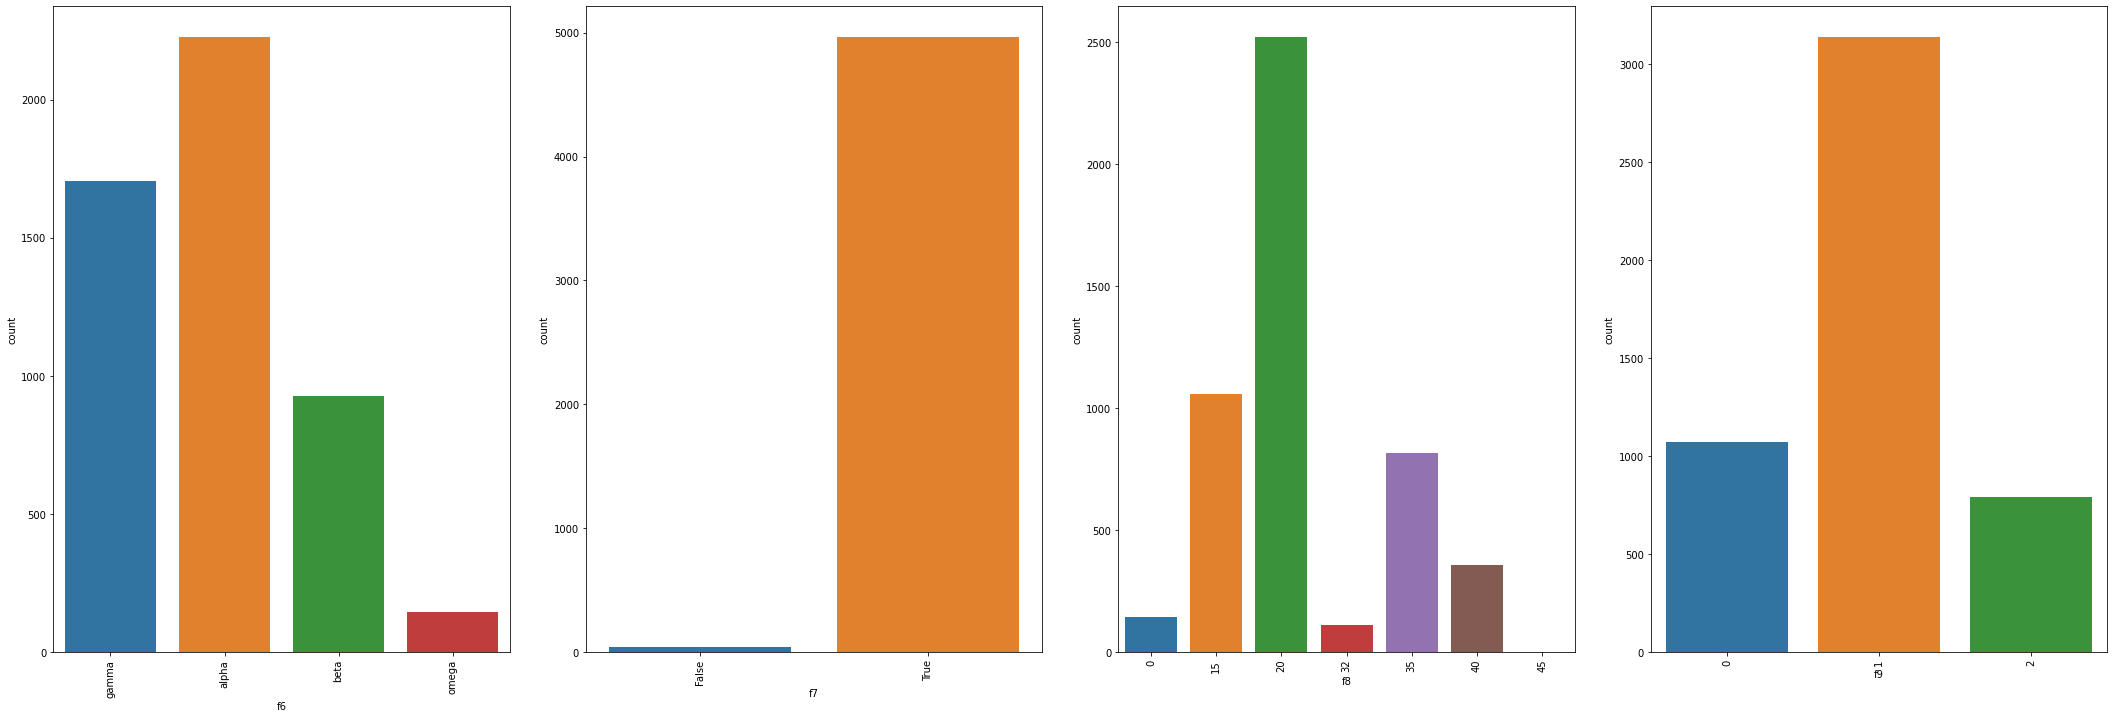

In [36]:
# Plotting categorical count plot
c=1
plt.figure(figsize=(30,20))
for i in cat_col:
    plt.subplot(2,4,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


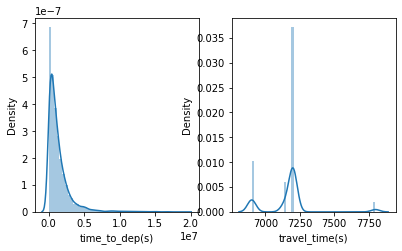

In [215]:
# Plotting numerical count plot
c=1
plt.figure(figsize=(10,25))
for i in num_col:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    c=c+1
plt.show()

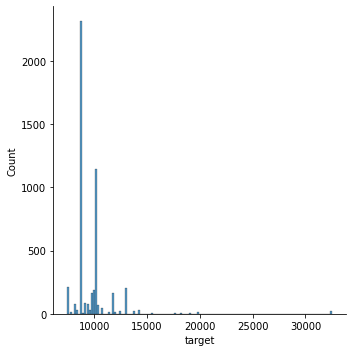

In [37]:
# target
sns.displot(df["target"])


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

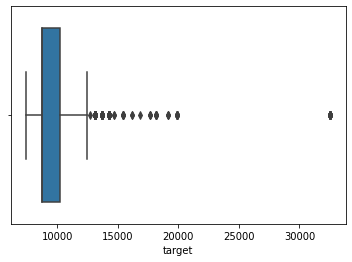

In [38]:
sns.boxplot(df["target"])

In [39]:
# skew and kurtosis
df.skew()
df.kurtosis()

C:\Users\hp\AppData\Local\Temp\ipykernel_12916\1137472872.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()
C:\Users\hp\AppData\Local\Temp\ipykernel_12916\1137472872.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dep(s)     20.796049
travel_time(s)      5.504109
f7                134.031335
f8                  0.046374
f9                 -0.310364
target             59.189400
dtype: float64

In [40]:
# encoding of variables
df.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
1612,1727580.0,7140.0,2021-06-16 17:06:59.662473+00:00,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,10227
4914,675022.0,7200.0,2021-08-27 11:29:37.356112+00:00,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,8697
4137,292864.0,7200.0,2021-03-08 19:38:55.101279+00:00,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,10227
2147,300026.0,6900.0,2021-03-14 04:39:33.073081+00:00,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,8739
4066,1353547.0,7200.0,2021-08-28 18:00:52.593708+00:00,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,11716


In [41]:
df.drop(["f1","f4","f5"],axis=1,inplace=True)

In [42]:
df.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
1612,1727580.0,7140.0,gamma,True,20,1,10227
4914,675022.0,7200.0,alpha,True,20,1,8697
4137,292864.0,7200.0,gamma,True,20,1,10227
2147,300026.0,6900.0,beta,True,20,0,8739
4066,1353547.0,7200.0,alpha,True,20,1,11716


In [43]:
# encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
# apply label encoder
df["f6"]=le.fit_transform(df["f6"])
df["f7"]=le.fit_transform(df["f7"])
df["f8"]=le.fit_transform(df["f8"])


In [45]:
df.sample(10)

,time_to_dep(s),travel_time(s),f6,f7,f8,f9,target
4942,2145921.0,7200.0,2,1,2,2,10227
4446,80251.0,7200.0,0,1,4,1,9877
502,1484287.0,7140.0,2,1,2,1,10227
3767,70648.0,7200.0,2,1,2,1,10227
4122,598123.0,7200.0,3,1,2,1,8697
4060,82234.0,6900.0,1,1,2,0,10721
2586,2760930.0,7800.0,0,1,4,1,10400
458,497389.0,7200.0,0,1,1,1,10227
3306,456483.0,6900.0,1,1,5,0,10227
3199,1250613.0,7200.0,2,1,2,2,8739


In [46]:
# skleran fucntion to normalize our data
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# df["time_to_dep(s)"]=sc.fit_transform(df["time_to_dep(s)"])
# df["travel_time(s)"]=sc.fit_transform(df["travel_time(s)"])
# df["target"]=sc.fit_transform(df["target"])

In [46]:
# Splitting our data into x and y
x=df.drop(["target"],axis=1)
y=df["target"]

In [47]:
x.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
1612,1727580.0,7140.0,2,1,2,1
4914,675022.0,7200.0,0,1,2,1
4137,292864.0,7200.0,2,1,2,1
2147,300026.0,6900.0,1,1,2,0
4066,1353547.0,7200.0,0,1,2,1


In [48]:
y.head()

1612    10227
4914     8697
4137    10227
2147     8739
4066    11716
Name: target, dtype: int64

# ML Modelling

In [49]:
# regression pipeline or algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# root mean squared error
# rms=mean_absolute_error(y_test,y_pred,squared=False)



In [50]:
# Shorten the names
lr=LinearRegression()
dt=DecisionTreeRegressor()
svr=SVR()
knn=KNeighborsRegressor()

In [87]:
lr.fit()
lr=lr(x_train,y_train)
pred=lr.predict()

In [51]:
# mode loop

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

for i in [lr,dt,svr,knn]: # read all models
    i.fit(x_train,y_train) # fitting our model
    pred=i.predict(x_test)   # prediction
    test_score=r2_score(y_test,pred) # test score
    train_score=r2_score(y_train,i.predict(x_train)) # train score
    if abs(train_score-test_score) <=0.1:
        print(i)
        print("r2_score is:",r2_score(y_test,pred))
        print("Mean absolute error:",mean_absolute_error(y_test,pred))
        print("Mean squared error:",mean_squared_error(y_test,pred))
        print("Root mean squared error:",mean_squared_error(y_test,pred,squared=False))




        


LinearRegression()
r2_score is: -0.0027118541563133647
Mean absolute error: 1215.9731108839949
Mean squared error: 5049902.452430303
Root mean squared error: 2247.1988012702177
SVR()
r2_score is: -0.1735332700049228
Mean absolute error: 1140.6270079979827
Mean squared error: 5910200.935235548
Root mean squared error: 2431.0904827331187


In [52]:
# mode loop

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

for i in [lr,dt,svr,knn]: # read all models
    i.fit(x_train,y_train) # fitting our model
    pred=i.predict(x_test)   # prediction
    test_score=r2_score(y_test,pred) # test score
    train_score=r2_score(y_train,i.predict(x_train)) # train score
    if abs(train_score-test_score) <=0.1:
        print(i)
        print("r2_score is:",r2_score(y_test,pred))
        print("Mean absolute error:",mean_absolute_error(y_test,pred))
        print("Mean squared error:",mean_squared_error(y_test,pred))
        print("Root mean squared error:",mean_squared_error(y_test,pred,squared=False))


LinearRegression()
r2_score is: -0.0026729835242871314
Mean absolute error: 1205.9980701121099
Mean squared error: 4091227.6149868513
Root mean squared error: 2022.678327116512
SVR()
r2_score is: -0.20203129551118537
Mean absolute error: 1103.2831104475622
Mean squared error: 4904673.518766113
Root mean squared error: 2214.649750810749


In [53]:
df_test=pd.read_csv("sastaticket_test.csv")
df_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,361,2021-09-01 08:34:37.298046+00:00,x,y,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,alpha,True,15,1,a-23
1,4557,2021-09-01 09:10:26.280027+00:00,x,y,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,alpha,True,20,1,a-9
2,344,2021-09-01 08:34:05.805148+00:00,x,y,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,omega,True,20,1,d-5
3,4030,2021-09-01 09:06:33.024587+00:00,x,y,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,beta,True,20,0,b-1
4,339,2021-09-01 08:34:03.203863+00:00,x,y,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,alpha,True,15,1,a-5


In [56]:
df_test.head()

,f1,f4,f5,f6,f7,f8,f9
0,2021-09-01 08:34:37.298046+00:00,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,alpha,True,15,1
1,2021-09-01 09:10:26.280027+00:00,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,alpha,True,20,1
2,2021-09-01 08:34:05.805148+00:00,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,omega,True,20,1
3,2021-09-01 09:06:33.024587+00:00,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,beta,True,20,0
4,2021-09-01 08:34:03.203863+00:00,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,alpha,True,15,1


## Converting them into dateand time

In [57]:
from datetime import date,datetime
df_test["f1"]=pd.to_datetime(df_test["f1"])
df_test["f4"]=pd.to_datetime(df_test["f4"])
df_test["f5"]=pd.to_datetime(df_test["f5"])



In [58]:
# type casting
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      250 non-null    datetime64[ns, UTC]
 1   f4      250 non-null    datetime64[ns, UTC]
 2   f5      250 non-null    datetime64[ns, UTC]
 3   f6      250 non-null    object             
 4   f7      250 non-null    bool               
 5   f8      250 non-null    int64              
 6   f9      250 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](3), int64(2), object(1)
memory usage: 12.1+ KB


In [59]:
# Adding colimn after substraction
df_test.insert(0,"time_to_dep(s)",((df_test["f4"]-df_test["f1"]).astype("timedelta64[s]")),True)
df_test.insert(1,"travel_time(s)",((df_test["f5"]-df_test["f4"]).astype("timedelta64[s]")),True)

In [60]:
df_test.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,10653922.0,7200.0,2021-09-01 08:34:37.298046+00:00,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,alpha,True,15,1
1,618573.0,7200.0,2021-09-01 09:10:26.280027+00:00,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,alpha,True,20,1
2,894654.0,7200.0,2021-09-01 08:34:05.805148+00:00,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,omega,True,20,1
3,1454006.0,6900.0,2021-09-01 09:06:33.024587+00:00,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,beta,True,20,0
4,10103156.0,7200.0,2021-09-01 08:34:03.203863+00:00,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,alpha,True,15,1


In [61]:
df_test.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,10653922.0,7200.0,2021-09-01 08:34:37.298046+00:00,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,alpha,True,15,1
1,618573.0,7200.0,2021-09-01 09:10:26.280027+00:00,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,alpha,True,20,1
2,894654.0,7200.0,2021-09-01 08:34:05.805148+00:00,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,omega,True,20,1
3,1454006.0,6900.0,2021-09-01 09:06:33.024587+00:00,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,beta,True,20,0
4,10103156.0,7200.0,2021-09-01 08:34:03.203863+00:00,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,alpha,True,15,1


# Encoding

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [63]:
# apply label encoder
df_test["f6"]=le.fit_transform(df_test["f6"])
df_test["f7"]=le.fit_transform(df_test["f7"])
df_test["f8"]=le.fit_transform(df_test["f8"])


In [64]:
df_test.head()

,time_to_dep(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,10653922.0,7200.0,2021-09-01 08:34:37.298046+00:00,2022-01-02 16:00:00+00:00,2022-01-02 18:00:00+00:00,0,0,0,1
1,618573.0,7200.0,2021-09-01 09:10:26.280027+00:00,2021-09-08 13:00:00+00:00,2021-09-08 15:00:00+00:00,0,0,1,1
2,894654.0,7200.0,2021-09-01 08:34:05.805148+00:00,2021-09-11 17:05:00+00:00,2021-09-11 19:05:00+00:00,3,0,1,1
3,1454006.0,6900.0,2021-09-01 09:06:33.024587+00:00,2021-09-18 05:00:00+00:00,2021-09-18 06:55:00+00:00,1,0,1,0
4,10103156.0,7200.0,2021-09-01 08:34:03.203863+00:00,2021-12-27 07:00:00+00:00,2021-12-27 09:00:00+00:00,0,0,0,1


In [65]:
df_test.drop(["f1","f4","f5"],axis=1,inplace=True)

In [66]:
df_test.head()

,time_to_dep(s),travel_time(s),f6,f7,f8,f9
0,10653922.0,7200.0,0,0,0,1
1,618573.0,7200.0,0,0,1,1
2,894654.0,7200.0,3,0,1,1
3,1454006.0,6900.0,1,0,1,0
4,10103156.0,7200.0,0,0,0,1


# Final prediction on given values for linear regression

In [77]:
x_test.shape

(250, 6)

In [78]:
x_test=x_test.sample(250)

In [84]:
res.shape

(250, 1)

In [85]:
lr=LinearRegression().fit(x,y)
pred=lr.predict(df_test)

# to save pred
res=pd.DataFrame(pred)
res.index=x_test.index     # its important for comparison
res.columns=["prediction"]
res.to_csv=["prediction_results_with_traintestsplit.csv"]


In [88]:
# Second Method
df1=pd.read_csv("sastaticket_train.csv")
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target
0,1612,1612.0,2021-06-16 17:06:59.662473+00:00,x,y,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,c-6,1612,10227
1,4914,4914.0,2021-08-27 11:29:37.356112+00:00,x,y,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,a-5,4914,8697
2,4137,4137.0,2021-03-08 19:38:55.101279+00:00,x,y,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,c-2,4137,10227
3,2147,2147.0,2021-03-14 04:39:33.073081+00:00,x,y,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,b-19,2147,8739
4,4066,4066.0,2021-08-28 18:00:52.593708+00:00,x,y,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,a-7,4066,11716


In [89]:
date_formate_str= "%Y,%m,%d % H:%M:%S.%f"

df1["f1"]=pd.to_datetime(df1["f1"])
df1["f4"]=pd.to_datetime(df1["f4"])

f1=pd.to_datetime(df1["f1"],date_formate_str)
f4=pd.to_datetime(df1["f4"],date_formate_str)

diff=f4-f1
df1["delta"]=diff

In [91]:
df1.head()

,Unnamed: 0.2,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.1,target,delta
0,1612,1612.0,2021-06-16 17:06:59.662473+00:00,x,y,2021-07-06 17:00:00+00:00,2021-07-06 18:59:00+00:00,gamma,True,20,1,c-6,1612,10227,19 days 23:53:00.337527
1,4914,4914.0,2021-08-27 11:29:37.356112+00:00,x,y,2021-09-04 07:00:00+00:00,2021-09-04 09:00:00+00:00,alpha,True,20,1,a-5,4914,8697,7 days 19:30:22.643888
2,4137,4137.0,2021-03-08 19:38:55.101279+00:00,x,y,2021-03-12 05:00:00+00:00,2021-03-12 07:00:00+00:00,gamma,True,20,1,c-2,4137,10227,3 days 09:21:04.898721
3,2147,2147.0,2021-03-14 04:39:33.073081+00:00,x,y,2021-03-17 16:00:00+00:00,2021-03-17 17:55:00+00:00,beta,True,20,0,b-19,2147,8739,3 days 11:20:26.926919
4,4066,4066.0,2021-08-28 18:00:52.593708+00:00,x,y,2021-09-13 10:00:00+00:00,2021-09-13 12:00:00+00:00,alpha,True,20,1,a-7,4066,11716,15 days 15:59:07.406292
